In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from sklearn.datasets import fetch_openml
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

print(__doc__)

#read the csv file into dataframe
dataset = pd.read_csv("GPR/LALearnOzoneGPR.csv")
dataset.head()




Automatically created module for IPython interactive environment


,DMax Ozone,Year,Month,Day,OZONE-WEIGHT,Flag,Site Name,Lat,Lng,Date
0,0.037,2016,1,1,17,0,Los Angeles-North Main Street,34.06659,-118.22688,1/1/2016
1,0.037,2016,1,1,17,0,Los Angeles-North Main Street,34.06659,-118.22688,1/1/2016
2,0.030,2016,1,7,13,0,Los Angeles-North Main Street,34.06659,-118.22688,1/7/2016
3,0.017,2016,1,13,17,0,Los Angeles-North Main Street,34.06659,-118.22688,1/13/2016
4,0.017,2016,1,13,17,0,Los Angeles-North Main Street,34.06659,-118.22688,1/13/2016


In [3]:
#target
y = dataset.iloc[:,0]

#dataset
X = dataset.iloc[:,1:6]
X.columns
#X.drop(['Site Name'],axis=1)


Index(['Year', 'Month', 'Day', 'OZONE-WEIGHT', 'Flag'], dtype='object')

C:\Users\eveba\.conda\envs\Machine_Learning\lib\site-packages\sklearn\gaussian_process\_gpr.py:506: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


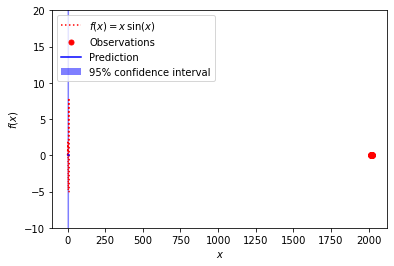

In [4]:
def Ozone_prep():

    months = []
    ppmv_sums = []
    counts = []
    
    m = X['Month']
    year = X['Year']
    month_float = year + (m - 1) / 12
    ppmvs = dataset.iloc[:,0]

    for month, ppmv in zip(month_float, ppmvs):
            if not months or month != months[-1]:
                months.append(month)
                ppmv_sums.append(ppmv)
                counts.append(1)
            else:
                # aggregate monthly sum to produce average
                ppmv_sums[-1] += ppmv
                counts[-1] += 1
            
    months = np.asarray(months).reshape(-1, 1)
    avg_ppmvs = np.asarray(ppmv_sums) / counts
    return months, avg_ppmvs
 
X, y = Ozone_prep()   

def f(x):
    """The function to predict."""
    return x * np.sin(x)

x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

In [5]:
# ----------------------------------------------------------------------
# now the noisy case
def Ozone_prep():

    months = []
    ppmv_sums = []
    counts = []
    
    m = X['Month']
    year = X['Year']
    month_float = year + (m - 1) / 12
    ppmvs = dataset.iloc[:,0]

    for month, ppmv in zip(month_float, ppmvs):
            if not months or month != months[-1]:
                months.append(month)
                ppmv_sums.append(ppmv)
                counts.append(1)
            else:
                # aggregate monthly sum to produce average
                ppmv_sums[-1] += ppmv
                counts[-1] += 1
            
    months = np.asarray(months).reshape(-1, 1)
    avg_ppmvs = np.asarray(ppmv_sums) / counts
    return months, avg_ppmvs
 
X, y = Ozone_prep()  
X, y = Ozone_prep()   

dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices